<a href="https://colab.research.google.com/github/Anna-bashkatova/ProgramAnalitik/blob/main/%D0%9B%D0%B0%D0%B1_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 4-1: работа с Pandas.

Pandas - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов.

In [ ]:
import pandas as pd

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двумерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series.

С помощью библиотеки Pandas займемся анализом данных. Будем работать с данными о клиентах банка, который интересуется, произойдет ли просрочка платежа на 90 и более дней при выдаче кредита. 

In [ ]:
from google.colab import files
unploaded = files.upload()

Saving data.csv to data.csv


### 1
Прочтите данные из файла data.csv

*Функции, которые могут пригодиться при решении: `pd.read_csv(..., delimiter=',')`*

In [ ]:
df = pd.read_csv('data.csv', delimiter=',')
df.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### 2
Выведите описание прочтенных данных. 

*Функции, которые могут пригодиться при решении: `.describe()`*

In [ ]:
df1 = df.copy(deep=True)
df1.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1094.000000,1350.000000,1350.000000,1350.000000,1350.000000,1307.000000
mean,675.500000,0.060000,3.577895,52.048889,0.257778,356.123363,6438.473492,8.434074,0.080000,0.986667,0.062222,0.737567
std,389.855743,0.237575,84.914699,15.009875,0.751718,1156.603074,7849.754675,5.129287,0.376634,1.008401,0.306555,1.086949
min,1.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,338.250000,0.000000,0.031140,40.000000,0.000000,0.175125,3300.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,675.500000,0.000000,0.156891,52.000000,0.000000,0.367049,5222.500000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,1012.750000,0.000000,0.543145,63.000000,0.000000,0.807001,8055.250000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1350.000000,1.000000,2340.000000,97.000000,10.000000,15466.000000,208333.000000,31.000000,5.000000,8.000000,5.000000,8.000000


### 3
Отобразите несколько первых и несколько последних записей.

*Функции, которые могут пригодиться при решении: `.head(), .tail()`*



In [ ]:
df3 = df.copy(deep=True)
df3.head(3)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [ ]:
df3.tail(4)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1346,1347,0,0.045694,49,0,0.300175,4000.0,14,0,1,0,1.0
1347,1348,0,0.022780,53,0,0.323068,10000.0,14,0,2,0,1.0
1348,1349,0,0.036934,56,0,0.287935,8362.0,8,0,1,0,2.0
1349,1350,0,0.000000,62,0,1463.000000,NaN,5,0,1,0,0.0


### 4
Прочтите в файле `DataDictionary-ru.txt`, что означают столбцы матрицы. 

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    1350 non-null   int64  
 1   SeriousDlqin2yrs                      1350 non-null   int64  
 2   RevolvingUtilizationOfUnsecuredLines  1350 non-null   float64
 3   age                                   1350 non-null   int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  1350 non-null   int64  
 5   DebtRatio                             1350 non-null   float64
 6   MonthlyIncome                         1094 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       1350 non-null   int64  
 8   NumberOfTimes90DaysLate               1350 non-null   int64  
 9   NumberRealEstateLoansOrLines          1350 non-null   int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  1350 non-null   int64  
 11  NumberOfDependent

### 5

Заметьте, что столбец `DebtRatio` содержит неправдоподобные данные. Только значения, соответствующие известному месячному доходу, являются отношениями. Остальные – абсолютные значения месячных выплат процентов. 

Исправьте данные, сделав все значения столбца `DebtRatio` абсолютными (умножьте их на `MonthlyIncome`).  Чтобы ваша программа быстро работала на полных данных, постарайтесь не использовать цикл.

In [ ]:
df5 = df.copy(deep=True)
df5['DebtRatio']=df5['DebtRatio']*df5['MonthlyIncome'] 
df52 = df5.fillna(0)
df52.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,7323.197016,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,316.878123,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,258.914887,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,118.963951,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,1584.975094,63588.0,7,0,1,0,0.0


### 6

Поменяйте имя столбца на `Debt`.

*Функции, которые могут пригодиться при решении: `.rename(columns={'староеИмя':'новоеИмя'}, inplace=True)`*

In [ ]:
df6 = df52.copy(deep=True)
df6.rename(columns={'DebtRatio':'Debt'}, inplace=True)
df6.head()

### 7

Вычислите средний ежемесячный доход и присвойте всем клиентам с неизвестным доходом полученное число.

*Функции, которые могут пригодиться при решении: `.mean()`*

*Другие описательные статистики:* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [ ]:
import numpy as np

In [ ]:
df7 = df6.copy(deep = True)

In [ ]:
data = df7['MonthlyIncome']
f=data.mean()
df7.loc[df7['MonthlyIncome'] < 0.99, 'MonthlyIncome'] = np.nan
df7['MonthlyIncome'] = df7['MonthlyIncome'].fillna(f)
df7.head()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,Debt,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,7323.197016,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,316.878123,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,258.914887,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,118.963951,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,1584.975094,63588.0,7,0,1,0,0.0


### 8

Используя метод `groupby`, оцените вероятности невозврата кредита (`SeriousDlqin2yrs=1`) для различных значений количества иждивенцев (`NumberOfDependents`).  

Проделайте аналогичную процедуру для различных значений столбца `NumberRealEstateLoansOrLines`

*Подсказка:*
`data['столбец1'].groupby(data['столбец2']).mean()`  *-- расчет средних значений столбца1 по группам из столбца2*

In [ ]:
df8 = df7.copy(deep = True)

In [ ]:
df8.SeriousDlqin2yrs == 1
k=df8[df8.SeriousDlqin2yrs == 1]
k.groupby('NumberRealEstateLoansOrLines').mean()[['NumberOfDependents']] 

,NumberOfDependents
NumberRealEstateLoansOrLines,
0,0.620690
1,1.173913
2,1.222222
3,0.750000
4,1.000000
6,2.000000


## Визуализация данных

In [ ]:
import seaborn as sns

### 9a

Постройте график рассеяния на осях `age` и `Debt`. Отметьте клиентов без серьезных задолженностей (`SeriousDlqin2yrs = 0`) и должников (`SeriousDlqin2yrs = 1`).

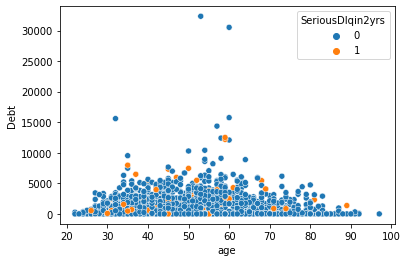

In [ ]:
sns.scatterplot(data=df7, x="age", y="Debt", hue="SeriousDlqin2yrs");

### 9b
Постройте на одном графике две **нормированные** плотности распределения: для месячного дохода клиентов с задолженностями, и для месячного дохода клиентов без задолженностей. По оси абсцисс отобразите значения до 25000.

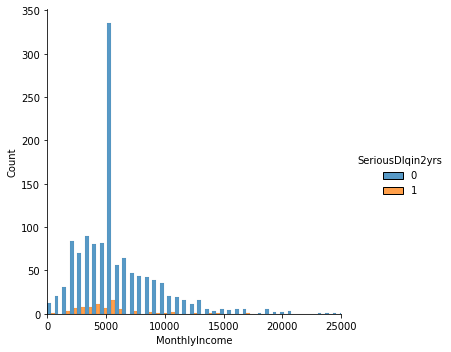

In [ ]:
sns.displot(x='MonthlyIncome', hue='SeriousDlqin2yrs', multiple='dodge', data=df7).set(xlim=(0,25000));